In [1]:
# Import the libraries
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import copy
# Technical indicator library
from myfeatures import GetFeaturesSALIB_THX

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import datetime
import threading
import math


In [2]:
using_features = ['hour','gap', 'cto1', 'cto2', 'ibs1', 'ibs2', 'fhigh0','flow0','fhigh4','flow4','fhigh10','flow10','fhigh20','flow20','daily_position0','daily_position1','daily_position2','weekly_position0','weekly_position1','weekly_position2']

Df = pd.read_csv("./WIN$N_M15.csv",delimiter=",",decimal=".",dtype = {'Open': np.double, 'High': np.double, 'Low': np.double, 'Close': np.double})

Df = Df.dropna()
Df['Time'] = pd.to_datetime(Df['Time'],dayfirst=True)
start = datetime.datetime.now()


# we need to rename the columns since the SA lib uses a diferent name
Df.rename(columns={'Time': 'time', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, inplace=True)
rates = Df.to_dict("records")
df_features = GetFeaturesSALIB_THX(rates,using_features)
df_features = df_features.shift(1)
Df = pd.concat([Df, df_features], axis=1)
# let's change back the column's name
Df.rename(columns={'time': 'Time', 'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)
Df['Time'] = pd.to_datetime(Df['Time'],dayfirst=True)



Df = Df.dropna()
# Prediction horizon (candles)
pred_horizon = 2

# Create a column 'Fut_Ret' with the calculation of returns
Df['Ret'] = (Df['Open'].shift(-pred_horizon)-Df['Open'])/Df['Open']

# # Create n columns and assign
# for i in range(1, n):
#     Df['return%i' % i] = Df['Ret'].shift(i)

Df = Df.dropna()

t = .8
split = int(t*len(Df))

# Create a column by name, 'Signal' and initialize with 0
Df['Signal']=0

# Assign a value of 1 to 'Signal' column for the quantile with highest returns
Df.loc[Df['Ret']>Df['Ret'][:split].quantile(q=0.66),'Signal']=1

# Assign a value of -1 to 'Signal' column for the quantile with lowest returns
Df.loc[Df['Ret']<Df['Ret'][:split].quantile(q=0.33),'Signal']=-1
# # # It is necessary for daytrade only. If you are using daily candles, please comment the lines below

# # Assign a value of 0 to 'Signal' column after 17h
Df.loc[(Df['Time'].dt.hour>16), 'Signal']=0

# Assign a value of 0 to 'Ret' column after 17h
Df.loc[(Df['Time'].dt.hour>16), 'Ret']=0

def sa(_params):
    diff = list(set(using_features) - set(_params))

    return Df.drop(diff, axis=1).copy()

Df

Calculating indicators!!


,Time,Open,High,Low,Close,Volume,cto1,cto2,fhigh0,flow0,...,gap,daily_position0,daily_position1,daily_position2,weekly_position0,weekly_position1,weekly_position2,hour,Ret,Signal
1,2014-02-13 09:15:00,48220.0,48250.0,48140.0,48225.0,3781,0.000000,0.000000,-0.001036,0.001453,...,0.000000,3.0,0.0,0.0,3.0,0.0,0.0,9.0,-0.000518,0
2,2014-02-13 09:30:00,48230.0,48235.0,48160.0,48195.0,2224,0.000000,0.000000,-0.001139,0.001766,...,0.000000,3.0,0.0,0.0,3.0,0.0,0.0,9.0,-0.000311,0
3,2014-02-13 09:45:00,48195.0,48250.0,48175.0,48210.0,2332,0.000000,0.000000,-0.001761,0.001143,...,0.000000,3.0,0.0,0.0,3.0,0.0,0.0,9.0,-0.001037,-1
4,2014-02-13 10:00:00,48215.0,48215.0,48025.0,48140.0,11375,0.000000,0.000000,-0.001450,0.001454,...,0.000000,3.0,0.0,0.0,3.0,0.0,0.0,9.0,-0.001452,-1
5,2014-02-13 10:15:00,48145.0,48195.0,48075.0,48155.0,4393,0.000000,0.000000,-0.002900,0.002395,...,0.000000,3.0,0.0,0.0,3.0,0.0,0.0,10.0,-0.005504,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77370,2022-09-20 11:30:00,112975.0,113020.0,112510.0,112790.0,610555,0.039344,0.002634,-0.004055,0.007222,...,-0.004936,1.0,2.0,0.0,0.0,2.0,1.0,11.0,-0.001062,-1
77371,2022-09-20 11:45:00,112785.0,112910.0,112615.0,112855.0,417011,0.039344,0.002634,-0.005686,0.005572,...,-0.004936,1.0,2.0,0.0,0.0,2.0,1.0,11.0,0.000975,0
77372,2022-09-20 12:00:00,112855.0,113050.0,112655.0,112895.0,450579,0.039344,0.002634,-0.005113,0.006152,...,-0.004936,1.0,2.0,0.0,0.0,2.0,1.0,11.0,0.000709,0
77373,2022-09-20 12:15:00,112895.0,113175.0,112815.0,112935.0,447571,0.039344,0.002634,-0.004760,0.006508,...,-0.004936,1.0,2.0,0.0,0.0,2.0,1.0,12.0,0.001639,1


In [3]:
def generate_features():
    _features = []
    for gap in ['gap', '']:
        for cto in ['cto1', 'cto1,cto2', '']:
            for quadrant in ['quadrant', '']:
                for ibs in ['ibs1', 'ibs1,ibs2', '']:
                    for f in ['fhigh0,flow0', 'fhigh0,flow0,fhigh4,flow4',
                              'fhigh0,flow0,fhigh4,flow4,fhigh10,flow10',
                              'fhigh0,flow0,fhigh4,flow4,fhigh10,flow10,fhigh20,flow20', '']:
                        for d in ['daily_position0', 'daily_position0,daily_position1',
                                  'daily_position0,daily_position1,daily_position2', '']:
                            for w in ['weekly_position0', 'weekly_position0,weekly_position1',
                                      'weekly_position0,weekly_position1,weekly_position2', '']:
                                result = ''
                                if gap:
                                    result += gap
                                if cto:
                                    if result:
                                        result += ','
                                    result += cto
                                if quadrant:
                                    if result:
                                        result += ','
                                    result += quadrant
                                if ibs:
                                    if result:
                                        result += ','
                                    result += ibs
                                if f:
                                    if result:
                                        result += ','
                                    result += f
                                if d:
                                    if result:
                                        result += ','
                                    result += d
                                if w:
                                    if result:
                                        result += ','
                                    result += w
                                if result:
                                    _features.append(['hour'] + result.split(','))
    return _features

# Calculate other metrics

def CalculateMetrics(_returns, _y_pred, _dates, optimize=False, prediction_horizon=1, type_='percentual'):
    #Receive the dates, predictions and returns, apply a simple trading strategy (exit position after n candles, without tp and sl), and show the results and graph"""

    #--- get the returns if we follow the strategy (follow the prediction signals) - it is equivalent to buying or selling according to the signal, and keep the position for n candles. We can have multiple positions at the same time, without sl and tp
    strategy_returns=[_y_pred[i] * _returns[i] for i in range(0, len(_y_pred))]

    #--- get the cumulative return of our strategy - increasing position - juros composto
    strategy_accumulated_prod = 1
    for i in range(1, len(strategy_returns)):
        strategy_accumulated_prod *= (strategy_returns[i]+1)
    strategy_accumulated_prod -= 1

    #--- get the cumulative return of our strategy
    strategy_accumulated = copy.copy(strategy_returns)
    for i in range(1, len(strategy_accumulated)):
        strategy_accumulated[i] = strategy_accumulated[i-1] + strategy_returns[i]

    #--- get the cumulative return of the asset - where we buy only, at every candle, and keeps the position opened for n candles
    asset_accumulated = copy.copy(_returns)
    for i in range(1, len(asset_accumulated)):
        asset_accumulated[i] = asset_accumulated[i-1] + _returns[i]


    #--- get the cumulative loss of our strategy - draw down
    strategy_drawdown = copy.copy(strategy_returns)
    for i in range(1, len(strategy_drawdown)):
        strategy_drawdown[i] = (strategy_drawdown[i-1] + strategy_returns[i] if strategy_drawdown[i-1] + strategy_returns[i] < 0 else 0)

    drawdown_max = np.min(np.array(strategy_drawdown))
    drawdown_mean = np.mean(np.array(strategy_drawdown))
    total_return = strategy_accumulated[-1]
    total_days = len(list(set([date.strftime("%Y-%m-%d") for date in _dates])))
    total_months = total_days / 21
    monthly_return = (total_return/total_months if total_months>0 else 0)
    drawdown_max_by_monthly_return = (-drawdown_max/monthly_return if monthly_return != 0 else 0)
    drawdown_mean_by_monthly_return = (-drawdown_mean/monthly_return if monthly_return != 0 else 0)


    #--- calculating a few metrics

    if optimize:
        e = []
        for i,pred in enumerate(_y_pred):
            if _y_pred[max(0, i - prediction_horizon)] != pred: e.append(abs(pred))
        entries = np.sum(np.array(e))
    else:
        entries = np.sum(np.array([abs(pred) for pred in _y_pred]))
        entries_buy = int(np.sum(np.array([abs(pred) for pred in _y_pred if pred > 0])))
        entries_sell = int(np.sum(np.array([abs(pred) for pred in _y_pred if pred < 0])))
    total_return = strategy_accumulated[-1]
    if entries>0:
        return_per_entry = total_return / entries
    else:
        return_per_entry = 0

    poss = sum([1 for return_ in strategy_returns if return_ > 0])
    negs = sum([1 for return_ in strategy_returns if return_ < 0])
    success = (poss+1) / (poss + negs+2)

    poss_ = sum([return_ for return_ in strategy_returns if return_ > 0])
    negs_ = sum([return_ for return_ in strategy_returns if return_ < 0])
    profitFactor = -((poss_+0.000001)/(negs_+0.000001))
    return [round(total_return*100,4), entries, round(return_per_entry*100,4), round(success*100,2), round(profitFactor,2), total_days, round(total_months,4), round(monthly_return*100,4), round(drawdown_max*100,4), round(drawdown_mean*100,4), entries_buy, entries_sell]

def PreviousCalculateMetrics(returns,y_pred,dates,optimize=False,prediction_horizon=1,type_='percentual'):
    #Receive the dates, predictions and returns, apply a simple trading strategy (exit position after n candles, without tp and sl), and show the results and graph"""

    #--- get the returns if we follow the strategy (follow the prediction signals) - it is equivalent to buying or selling according to the signal, and keep the position for n candles. We can have multiple positions at the same time, without sl and tp
    strategy_returns=[y_pred[i]*returns[i] for i in range(0,len(y_pred))]

    #--- get the cumulative return of our strategy - increasing position - juros composto
    strategy_accumulated_prod = 1
    for i in range(1, len(strategy_returns)):
        strategy_accumulated_prod *= (strategy_returns[i]+1)
    strategy_accumulated_prod -= 1

    #--- get the cumulative return of our strategy
    strategy_accumulated = copy.copy(strategy_returns)
    for i in range(1, len(strategy_accumulated)):
        strategy_accumulated[i] = strategy_accumulated[i-1] + strategy_returns[i]

    #--- get the cumulative return of the asset - where we buy only, at every candle, and keeps the position opened for n candles
    asset_accumulated = copy.copy(returns)
    for i in range(1, len(asset_accumulated)):
        asset_accumulated[i] = asset_accumulated[i-1] + returns[i]


    #--- get the cumulative loss of our strategy - draw down
    strategy_drawdown = copy.copy(strategy_returns)
    for i in range(1, len(strategy_drawdown)):
        strategy_drawdown[i] = (strategy_drawdown[i-1] + strategy_returns[i] if strategy_drawdown[i-1] + strategy_returns[i] < 0 else 0)

    drawdown_max = np.min(np.array(strategy_drawdown))
    drawdown_mean = np.mean(np.array(strategy_drawdown))
    total_return = strategy_accumulated[-1]
    total_days = len(list(set([date.strftime("%Y-%m-%d") for date in dates])))
    total_months = total_days / 21
    monthly_return = (total_return/total_months if total_months>0 else 0)
    drawdown_max_by_monthly_return = (-drawdown_max/monthly_return if monthly_return != 0 else 0)
    drawdown_mean_by_monthly_return = (-drawdown_mean/monthly_return if monthly_return != 0 else 0)


    #--- calculating a few metrics

    if optimize:
        e = []
        for i,pred in enumerate(y_pred):
            if y_pred[max(0,i-prediction_horizon)] != pred: e.append(abs(pred))
        entries = np.sum(np.array(e))
    else:
        entries = np.sum(np.array([abs(pred) for pred in y_pred]))
        entries_buy = int(np.sum(np.array([abs(pred) for pred in y_pred if pred>0])))
        entries_sell = int(np.sum(np.array([abs(pred) for pred in y_pred if pred<0])))
    total_return = strategy_accumulated[-1]
    if entries>0:
        return_per_entry = total_return / entries
    else:
        return_per_entry = 0

    poss = sum([1 for return_ in strategy_returns if return_ > 0])
    negs = sum([1 for return_ in strategy_returns if return_ < 0])
    success = (poss+1) / (poss + negs+2)

    poss_ = sum([return_ for return_ in strategy_returns if return_ > 0])
    negs_ = sum([return_ for return_ in strategy_returns if return_ < 0])
    profitFactor = -((poss_+0.000001)/(negs_+0.000001))

    if type_ == 'percentual':
        print(
            "\n \tTotal return: ",round(total_return*100,4),"%",
            "\n \tEntries: ", entries,
            "\n \tReturn per entry: ", round(return_per_entry*100,4),"%",
            "\n \tSuccess: ", round(success*100,2),"%",
            "\n \tRatio: ", round(profitFactor,2),
            "\n \tTotal of days: ", total_days,
            "\n \tTotal of months: ", round(total_months,4),
            "\n \tMonthly return: ", round(monthly_return*100,4),"%",
            "\n \tMax drawdown: ", round(drawdown_max*100,4),"%",
            "\n \tMean drawdown: ", round(drawdown_mean*100,4),"%",
            "\n \tBuy signals", entries_buy,
            "\n \tSell signals", entries_sell,
        )
    else:
        print(
            "\n \tTotal return: ",round(total_return,4),
            "\n \tEntries: ", entries,
            "\n \tReturn per entry: ", round(return_per_entry,4),
            "\n \tSuccess: ", round(success*100,2),"%",
            "\n \tRatio: ", round(profitFactor,2),
            "\n \tTotal of days: ", total_days,
            "\n \tTotal of months: ", round(total_months,4),
            "\n \tMonthly return: ", round(monthly_return,4),
            "\n \tMax drawdown: ", round(drawdown_max,4),
            "\n \tMean drawdown: ", round(drawdown_mean,4),
            "\n \tBuy signals", entries_buy,
            "\n \tSell signals", entries_sell,
        )


In [4]:
def execute_test(indicators__, result__, count__, lock__, print_result = False):
    count = count__
    for params in indicators__:
        try:
            lock__.acquire()
            print(str(count + 1) + " starting " + ','.join(params))
            lock__.release()
            df = sa(params)

            X = df.drop(['Ret',"Time","Signal", 'Close', 'Signal', 'High',
                         'Low', 'Open', 'Volume', 'Ret'], axis=1)

            # Create a variable which contains all the 'Signal' values
            y = df['Signal']

            cls = QuadraticDiscriminantAnalysis()

            ss1 = StandardScaler()

            # Pass the scaled train data to the SVC classifier
            cls.fit(ss1.fit_transform(X.iloc[:split]),y.iloc[:split])

            # Pass the test data to the predict function and store the values into 'y_predict'
            y_predict = cls.predict(ss1.transform(X.iloc[split:]))

            # This is an alternative approach to generate the predictions.
            # It uses the same method used in the ML framework, generates predictions based on a list of probability
            # Please, uncomment the last line of this code block if you want to use it

            y_prob = cls.predict_proba(ss1.transform(X.iloc[split:]))

            # Initiate a column by name, 'Pred_Signal' and assign 0 to it
            df['Pred_Signal'] = 0

            # Save the predicted values for the train data
            # df.iloc[:split,df.columns.get_loc('Pred_Signal')] = pd.Series(cls.predict(ss1.transform(X.iloc[:split])).tolist())
            df.iloc[:split,df.columns.get_loc('Pred_Signal')] =cls.predict(ss1.transform(X.iloc[:split]))

            # Save the predicted values for the test data
            df.iloc[split:,df.columns.get_loc('Pred_Signal')] = y_predict

            df['Profit'] = df['Pred_Signal']*df['Ret']

            df["Test_Set"] = 0
            df.loc[split:,"Test_Set"] = 1
            # df.to_csv("output_pred.csv")

            df.to_csv("output_pred.csv")
            # Calculate strategy returns and store them in 'Ret1' column
            df['Ret1'] = df['Ret'] * df['Pred_Signal']

            # Strategy Metrics
            returns = list(df['Ret'][split:])
            y_pred = list(df['Pred_Signal'][split:])
            dates = list(df['Time'][split:])
            metrics_test = CalculateMetrics(returns,y_pred,dates,type_='percentual')

            # Strategy Metrics
            returns = list(df['Ret'][:split])
            y_pred = list(df['Pred_Signal'][:split])
            dates = list(df['Time'][:split])
            metrics_training = CalculateMetrics(returns, y_pred, dates, type_='percentual')

            ok = [','.join(params)] + metrics_training + metrics_test
            lock__.acquire()
            result__.append(ok)
            if print_result:
                # Strategy Metrics
                returns = list(df['Ret'][split:])
                y_pred = list(df['Pred_Signal'][split:])
                dates = list(df['Time'][split:])
                print("\nStrategy results %: ")
                PreviousCalculateMetrics(returns,y_pred,dates,type_='percentual')

                returns_absolute = list((df['Ret']*df['Open'])[split:])
                print("\nStrategy results: ")
                PreviousCalculateMetrics(returns_absolute,y_pred,dates,type_='points')

                df.set_index("Time", inplace=True)
                # Plot the strategy returns in the test period
                plt.figure(figsize=(10,10))
                # plt.plot(((df['Ret'][:split]+1).cumprod()-1),color='r',label='Mini-índice')
                # plt.plot(((df['Ret1'][:split]+1).cumprod()-1),color='g',label='Estratégia')
                plt.plot(((df['Ret'][:split]).cumsum()),color='r',label='Baseline')
                plt.plot(((df['Ret1'][:split]).cumsum()),color='g',label='estratégia')
                plt.plot((((df['Open'].shift(-1) - df['Open']) / df['Open'])[:split] + 1).cumprod() - 1, color='b', label='winfut')
                plt.legend()
                plt.xticks(rotation=-45)
                plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
                plt.show()


                # Plot the strategy returns in the test period
                plt.figure(figsize=(10,10))
                # plt.plot(((df['Ret'][split:]+1).cumprod()-1),color='r',label='Mini-índice')
                # plt.plot(((df['Ret1'][split:]+1).cumprod()-1),color='g',label='Estratégia')
                plt.plot(((df['Ret'][split:]).cumsum()),color='r',label='Baseline')
                plt.plot(((df['Ret1'][split:]).cumsum()),color='g',label='estratégia-teste')
                plt.plot((((df['Open'].shift(-1) - df['Open']) / df['Open'])[split:] + 1).cumprod() - 1, color='b', label='winfut')
                plt.legend()
                plt.xticks(rotation=-45)
                plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
                plt.show()
            lock__.release()
            count += 1
            lock__.acquire()
            print(str(count) + ' finishing ' + ','.join(params))
            lock__.release()
        except Exception as e:
            count += 1
            lock__.acquire()
            print(str(count) + 'ERROR ERROR ERROR ' + ','.join(params))
            print(e)
            lock__.release()


def runFullTest(params_, csv_name):
    lock = threading.Lock()
    results = []
    threads = [None] * 2
    slice_size = math.ceil(float(len(params_)) / float(len(threads)))

    for i in range(len(threads)):
        params = params_[(i * slice_size):((i + 1) * slice_size)]
        threads[i] = threading.Thread(target=execute_test, args=(params, results, i * slice_size, lock))
        threads[i].start()

    for i in range(len(threads)):
        threads[i].join()
    columns_training = ['Total return (training)', 'Entries (training)', 'Return per entry (training)', 'Success (training)', 'Ratio (training)', 'Total of days (training)', 'Total of months (training)', 'Monthly return (training)', 'Max drawdown (training)', 'Mean drawdown (training)', 'Buy signals (training)', 'Sell signals (training)']
    columns_test = ['Total return (test)', 'Entries (test)', 'Return per entry (test)', 'Success (test)', 'Ratio (test)', 'Total of days (test)', 'Total of months (test)', 'Monthly return (test)', 'Max drawdown (test)', 'Mean drawdown (test)', 'Buy signals (test)', 'Sell signals (test)']

    resultsDf = pd.DataFrame(results, columns=['features'] + columns_training + columns_test)
    resultsDf.to_csv(f'{csv_name}.csv', index=False)
    return resultsDf

In [ ]:
features = generate_features()
runFullTest(features, 'test-salib')

1 starting hour,gap,cto1,quadrant,ibs1,fhigh0,flow0,daily_position0,weekly_position0
1441 starting hour,cto1,quadrant,ibs1,fhigh0,flow0,daily_position0,weekly_position0
1441 finishing hour,cto1,quadrant,ibs1,fhigh0,flow0,daily_position0,weekly_position0
1442 starting hour,cto1,quadrant,ibs1,fhigh0,flow0,daily_position0,weekly_position0,weekly_position1
1 finishing hour,gap,cto1,quadrant,ibs1,fhigh0,flow0,daily_position0,weekly_position0
2 starting hour,gap,cto1,quadrant,ibs1,fhigh0,flow0,daily_position0,weekly_position0,weekly_position1
1442 finishing hour,cto1,quadrant,ibs1,fhigh0,flow0,daily_position0,weekly_position0,weekly_position1
1443 starting hour,cto1,quadrant,ibs1,fhigh0,flow0,daily_position0,weekly_position0,weekly_position1,weekly_position2
2 finishing hour,gap,cto1,quadrant,ibs1,fhigh0,flow0,daily_position0,weekly_position0,weekly_position1
3 starting hour,gap,cto1,quadrant,ibs1,fhigh0,flow0,daily_position0,weekly_position0,weekly_position1,weekly_position2
1443 finishing 

1 starting hour,quadrant,fhigh0,flow0,weekly_position0,weekly_position1

Strategy results %: 

 	Total return:  72.0962 % 
 	Entries:  4917 
 	Return per entry:  0.0147 % 
 	Success:  51.72 % 
 	Ratio:  1.12 
 	Total of days:  416 
 	Total of months:  19.8095 
 	Monthly return:  3.6395 % 
 	Max drawdown:  -17.8775 % 
 	Mean drawdown:  -6.1335 % 
 	Buy signals 1192 
 	Sell signals 3725

Strategy results: 

 	Total return:  82915.0 
 	Entries:  4917 
 	Return per entry:  16.8629 
 	Success:  51.72 % 
 	Ratio:  1.13 
 	Total of days:  416 
 	Total of months:  19.8095 
 	Monthly return:  4185.613 
 	Max drawdown:  -20500.0 
 	Mean drawdown:  -6726.6239 
 	Buy signals 1192 
 	Sell signals 3725


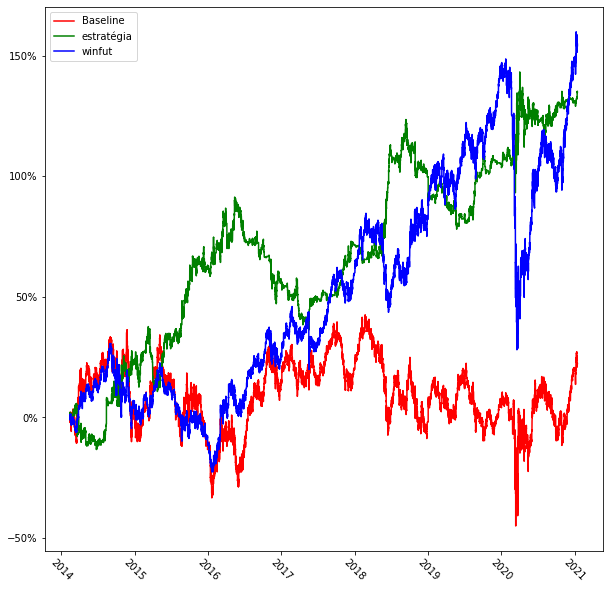

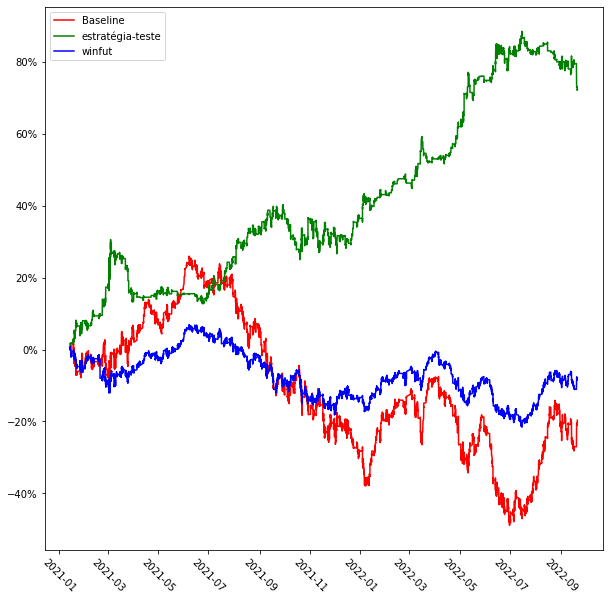

1 finishing hour,quadrant,fhigh0,flow0,weekly_position0,weekly_position1


In [8]:
lock = threading.Lock()
execute_test([['hour','quadrant','fhigh0','flow0','weekly_position0','weekly_position1']],
             [], 0, lock, True)